In [1]:
X_train = pd.read_csv("X_train_09.csv")
X_test = pd.read_csv("X_test_09.csv")
y_train = pd.read_csv("y_train_09.csv")
y_test = pd.read_csv("y_test_09.csv")

In [7]:
dfX = pd.concat([X_train, X_test])

In [8]:
dfy = pd.concat([y_train, y_test])

In [9]:
dfX.drop('Unnamed: 0', axis=1, inplace=True)
dfX.head()

,title,director,distributor,distributor_group,release_date,release_season,nation,screen,genre,rate,...,starring_actors,running_times,audience_rating,rating_audiences,director_power,sequel,original,actor_power,before_news,after_news
0,인사이드 아웃,피트 닥터,월트디즈니컴퍼니코리아(주),B,7/9/2015,summer,미국,777,애니메이션,전체관람가,...,"에이미 포엘러,필리스 스미스,민디 캘링",102,9.113006,938,4968687.0,0,0,14906061,15150.0,384.0
1,바다 탐험대 옥토넛 시즌4: 아슬아슬 구조대작전,다라 오코넬,와이드 릴리즈(주),D,6/2/2016,summer,영국,162,애니메이션,전체관람가,...,"하성용,정재헌,엄상현",68,8.451613,155,1206342.0,1,1,26048880,11.0,8.0
2,신비아파트: 금빛 도깨비와 비밀의 동굴,김병갑,씨제이이앤엠(주),A,7/25/2018,summer,한국,762,애니메이션,전체관람가,...,"조현정,김영은,김채하",68,8.859649,912,678091.0,1,1,13907061,739.0,236.0
3,순종,"김동민,이주훈","(재)CBS,(주)영화사 안다미로",C,11/17/2016,autumn,한국,104,다큐멘터리,전체관람가,...,"김영화,김은혜,한성국",88,9.636364,11,162432.0,1,0,0,48048.0,105.0
4,인크레더블 2,브래드 버드,월트디즈니컴퍼니코리아 유한책임회사,B,7/18/2018,summer,미국,1605,애니메이션,전체관람가,...,"크레이그 T. 넬슨,사무엘 L. 잭슨,홀리 헌터",125,9.346312,2671,3564540.0,1,0,245078391,8398.0,584.0


In [10]:
dfy.drop('Unnamed: 0', axis=1, inplace=True)
dfy.head()

,aud_nationwide,log_aud
0,4968687,15.418666
1,56866,10.948453
2,678091,13.427037
3,54144,10.899402
4,3033052,14.925080


In [11]:
len(dfX), len(dfy)

(925, 925)

In [13]:
df = pd.concat([dfX, dfy], axis=1)

In [15]:
df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'nation', 'screen', 'genre', 'rate', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'director_power', 'sequel', 'original',
       'actor_power', 'before_news', 'after_news', 'aud_nationwide',
       'log_aud'],
      dtype='object')

In [16]:
df.drop('log_aud', axis=1, inplace=True)

In [17]:
df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'nation', 'screen', 'genre', 'rate', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'director_power', 'sequel', 'original',
       'actor_power', 'before_news', 'after_news', 'aud_nationwide'],
      dtype='object')

In [18]:
df.to_csv("data_09.csv", mode='w')

In [104]:
df = pd.read_csv("../final_df_03_ols.csv")

In [105]:
df.drop('Unnamed: 0', axis=1, inplace=True)

### 결측치 확인

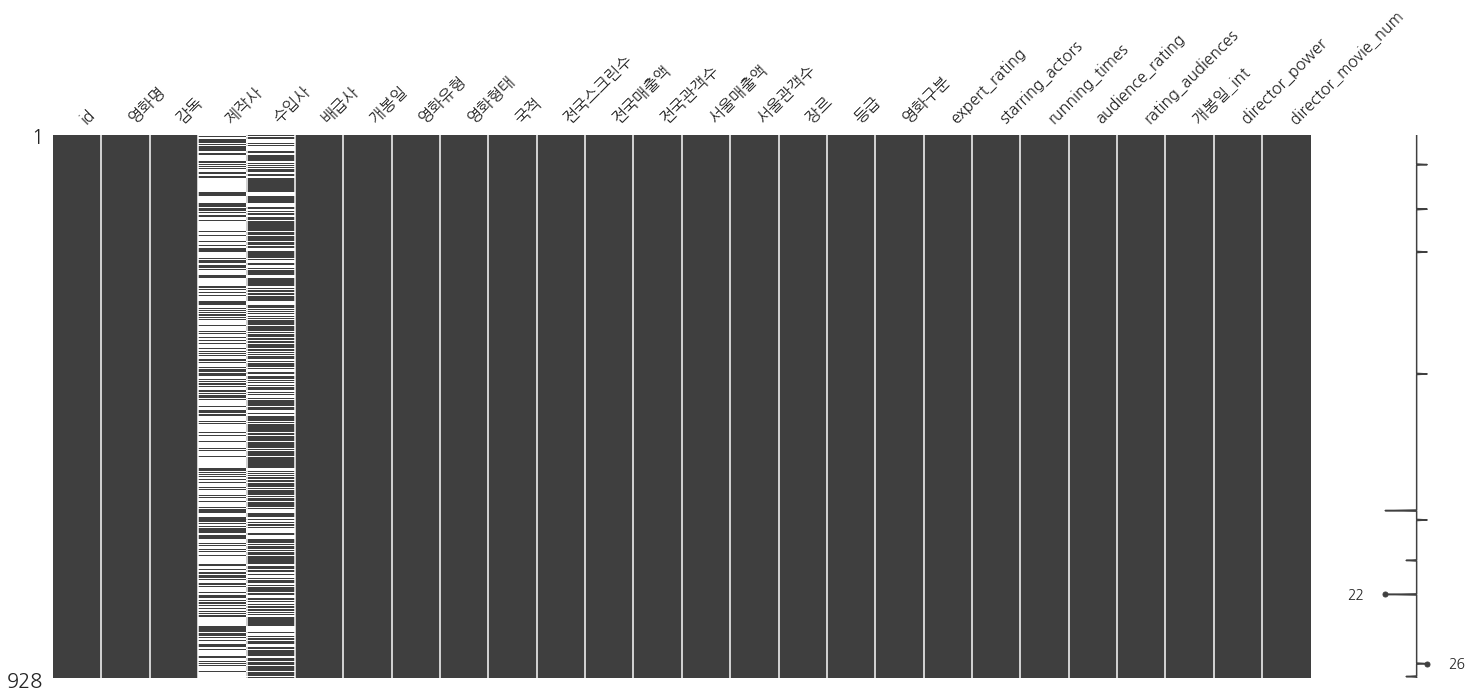

In [3]:
import missingno as msno

msno.matrix(df)
plt.show()

### 독립변수와 종속변수의 관계
- 전국스크린수가 많을수록 전국관객수가 많아진다
- 감독파워에 3건의 이상치가 있다
- 전문가평점과 관객평점은 ??

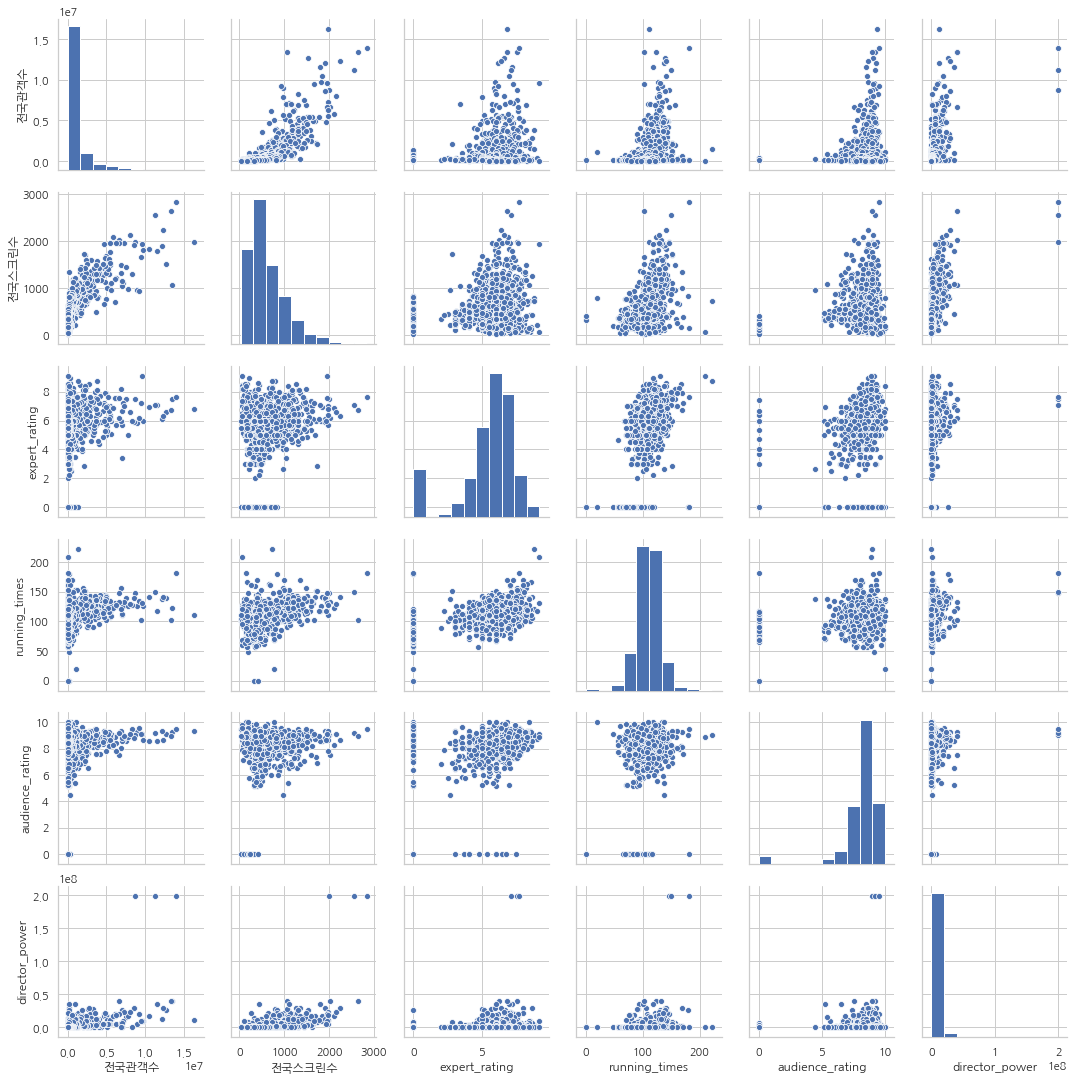

In [4]:
col = ["전국관객수", "전국스크린수", "expert_rating", "running_times", "audience_rating", "director_power"]
sns.pairplot(df[col])
plt.show()

### 전문가평점과 관객평점 
- 전문가평점은 관객평점보다 평균이 낮고 편차가 크다
- 관객평점과 전문가평점이 항상 같이 움직이는 것은 아니다

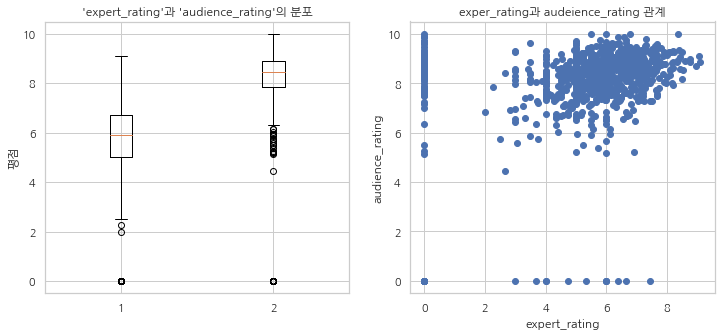

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.boxplot((df['expert_rating'], df['audience_rating']))
plt.title("'expert_rating'과 'audience_rating'의 분포")
plt.ylabel("평점")

plt.subplot(122)
plt.scatter(df['expert_rating'], df['audience_rating'])
plt.title("exper_rating과 audeience_rating 관계")
plt.xlabel("expert_rating")
plt.ylabel("audience_rating")

plt.show()

### 배급사
- 140 군데 배급사
- 최소값 1, 최대값 85
- 배급사에 등급 매기기 : A(국내메이저), B(헐리우드메이저), C(기타)

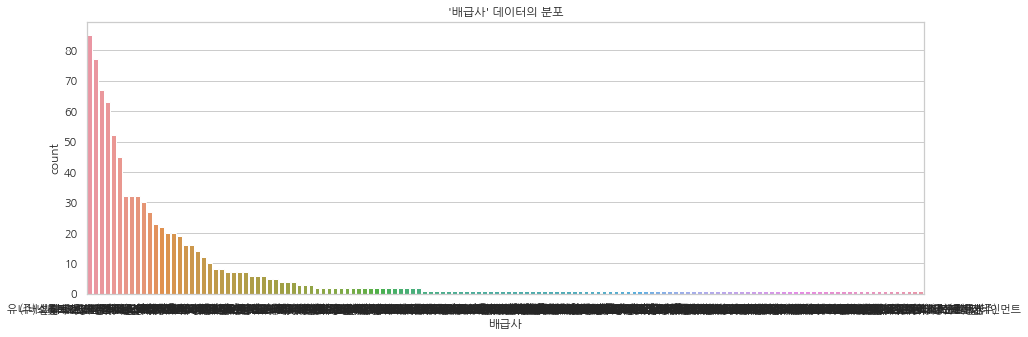

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x = '배급사', data = df, order = df['배급사'].value_counts().index)
plt.title("'배급사' 데이터의 분포")
plt.show()

In [23]:
pd.DataFrame(df['배급사'].describe())

,배급사
count,927
unique,140
top,씨제이이앤엠(주)
freq,85


In [31]:
df['count'] = 1
df_count = df.groupby('배급사').sum()
df_count[['count']].sort_values(by = 'count', ascending = False)

,count
배급사,
씨제이이앤엠(주),85
유니버설픽쳐스인터내셔널 코리아(유),77
(주)넥스트엔터테인먼트월드(NEW),67
워너브러더스 코리아(주),63
롯데쇼핑㈜롯데엔터테인먼트,52
...,...
(주)시네마달,1
"(주)스톰픽쳐스코리아,주식회사 우리네트웍스",1
"(주)스톰픽쳐스코리아,(주)페퍼민트앤컴퍼니",1


#### 배급사 A, B, C 등급 나누기

In [99]:
group_a = ['씨제이이앤엠(주)', '메가박스중앙(주)플러스엠', 'CGV아트하우스', '롯데쇼핑㈜롯데엔터테인먼트',
       'CGV아트하우스,(주)대명문화공장', '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트',
       'CGV아트하우스,(주)리틀빅픽쳐스', 'CGV아트하우스,영화사 풀', '메가박스중앙(주)플러스엠,(주)키위미디어그룹',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스', '메가박스중앙(주)플러스엠,주식회사 키위컴퍼니',
       '씨제이 씨지브이(CJ CGV)(주)', '롯데컬처웍스(주)롯데엔터테인먼트',
       '롯데컬처웍스(주)롯데엔터테인먼트,씨네그루(주)키다리이엔티', '메가박스중앙(주)플러스엠,(주)콘텐츠 난다긴다',
       '씨제이이앤엠(주),(주)덱스터스튜디오', '(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스,(주)와우픽쳐스',
       '(주)넥스트엔터테인먼트월드(NEW),(주)팬엔터테인먼트']
group_b = ['월트디즈니컴퍼니코리아(주)', '이십세기폭스코리아(주)', '유니버설픽쳐스인터내셔널 코리아(유)',
       '워너브러더스 코리아(주)', '씨네그루(주)다우기술', '(주)이수C&E', '(주)티캐스트',
       '씨네그루(주)키다리이엔티', '월트디즈니컴퍼니코리아 유한책임회사', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
       '(주)이수C&E,(주)스톰픽쳐스코리아', '씨네그루(주)키다리이엔티,주식회사 키위컴퍼니',
       '(주)이수C&E,(주)에이원엔터테인먼트', '씨네그루(주)키다리이엔티,(주)삼백상회',
       '(주)이수C&E,(주)시너지미디어', '(주)셀트리온엔터테인먼트', '케이티하이텔(주)']


In [106]:
df['dist_cat'] = df['배급사']
for a in group_a:
    df['dist_cat'] = df['dist_cat'].replace(a, 'A')

for b in group_b:
    df['dist_cat'] = df['dist_cat'].replace(b, 'B')

In [107]:
df['dist_cat'] = df['dist_cat'].apply(lambda data : "C" if data != 'A' and data != 'B' else data)

In [108]:
df['dist_cat'].unique()

array(['B', 'A', 'C'], dtype=object)

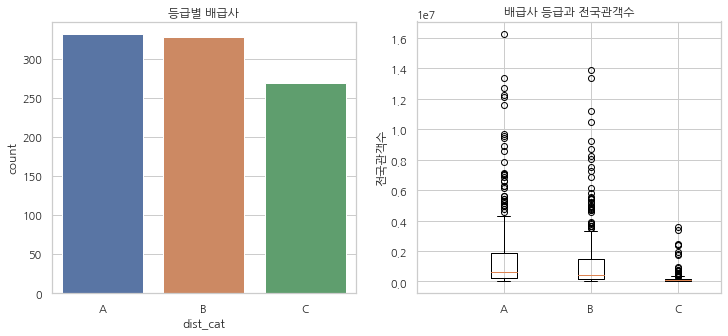

In [127]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.countplot(df['dist_cat'], order = df['dist_cat'].value_counts().index)
plt.title("등급별 배급사")

plt.subplot(122)
plt.boxplot((df[df['dist_cat'] == 'A']['전국관객수'], df[df['dist_cat'] == 'B']['전국관객수'], df[df['dist_cat'] == 'C']['전국관객수']))
plt.ylabel("전국관객수")
plt.xticks(np.arange(4), (' ', 'A', 'B', 'C'))
plt.title("배급사 등급과 전국관객수")
plt.show()

### 국적
- 24개 국가 중 미국에서 제작한 영화가 396개로 가장 많음
- 그 뒤를 이어 한국, 일본, 영국, 프랑스 순
- 상위 5개 국가 외 나머지는 기타로 처리
- 미국 영화보다 한국영화가 관람객평균이 높았고 '극한직업'이 '어벤져스:앤드게임'보다 관람객수가 많았다 

In [129]:
df['국적'].describe()

count     928
unique     24
top        미국
freq      396
Name: 국적, dtype: object

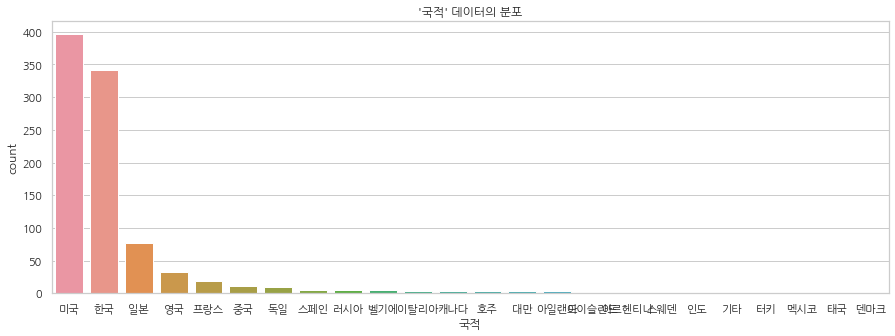

In [130]:
plt.figure(figsize=(15, 5))
sns.countplot(x = '국적', data = df, order = df['국적'].value_counts().index)
plt.title("'국적' 데이터의 분포")
plt.show()

In [134]:
df['nation_cat'] = df['국적'].apply(lambda data : '기타' if data != '미국' and data != '한국' and data != '일본' and data != '영국' and data != '프랑스' else data)

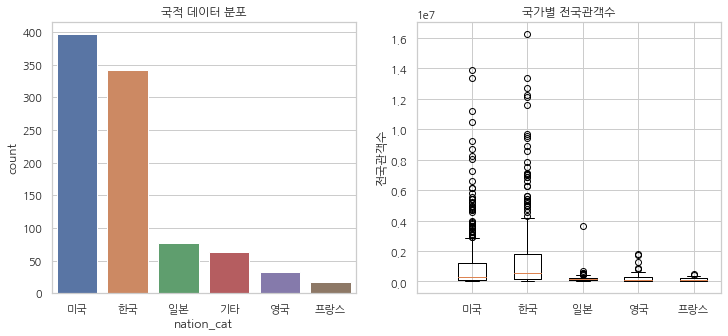

In [140]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.countplot(df['nation_cat'], order = df['nation_cat'].value_counts().index)
plt.title("국적 데이터 분포")

plt.subplot(122)
plt.boxplot((df[df['nation_cat'] == '미국']['전국관객수'], df[df['nation_cat'] == '한국']['전국관객수'], df[df['nation_cat'] == '일본']['전국관객수'],
            df[df['nation_cat'] == '영국']['전국관객수'], df[df['nation_cat'] == '프랑스']['전국관객수']))
plt.ylabel("전국관객수")
plt.xticks(np.arange(6), (' ', '미국', '한국', '일본', '영국', '프랑스'))
plt.title("국가별 전국관객수")
plt.show()

In [149]:
df.sort_values(by='전국관객수', ascending=False)[['영화명', '전국관객수', '국적']].head()

,영화명,전국관객수,국적
747,극한직업,16263360,한국
748,어벤져스: 엔드게임,13918759,미국
100,베테랑,13395400,한국
836,겨울왕국 2,13369087,미국
101,암살,12705700,한국


### 장르
- 19개 -> 14개 
- 애니메이션 장르에 '포켓몬', '짱구', '요괴워치', '신비아파트', '옥토넛' 등 극장판 애니메이션이 많음 

In [151]:
df['장르'].describe()

count       928
unique       19
top       애니메이션
freq        196
Name: 장르, dtype: object

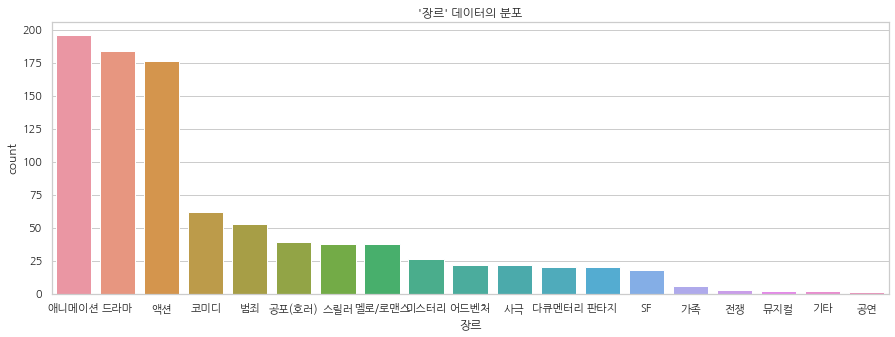

In [150]:
plt.figure(figsize=(15, 5))
sns.countplot(x = '장르', data = df, order = df['장르'].value_counts().index)
plt.title("'장르' 데이터의 분포")
plt.show()

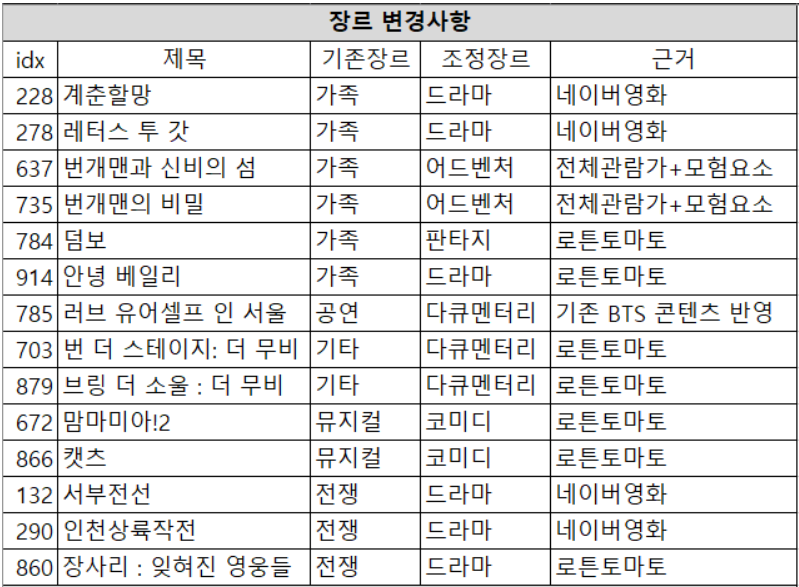

In [152]:
from IPython.display import Image
Image("장르변경.PNG")

In [156]:
df[df['장르'] == '애니메이션']['영화명'].unique()

array(['빅 히어로', '마다가스카의 펭귄', '도라에몽 : 스탠 바이 미', '홈', '스폰지밥 3D',
       '오즈의 마법사: 돌아온 도로시', '다이노 타임', '명탐정 코난 : 코난 실종사건 - 사상 최악의 이틀',
       '극장판 포켓몬스터 XY : 파괴의 포켓몬과 디안시', '노아의 방주: 남겨진 녀석들',
       '최강전사 미니특공대 : 새로운 악당의 습격', '짱구는 못말려 극장판 : 정면승부! 로봇아빠의 역습',
       '눈의 여왕 2: 트롤의 마법거울', '빌리와 용감한 녀석들 3', '더 라스트: 나루토 더 무비',
       '바다 탐험대 옥토넛 스페셜', '인사이드 아웃', '미니언즈', '몬스터 호텔 2',
       '극장판 요괴워치: 탄생의 비밀이다냥!', '명탐정 코난 : 화염의 해바라기', '어린왕자',
       '뽀로로 극장판 컴퓨터 왕국 대모험', '뮨: 달의 요정', '괴물의 아이',
       '포켓몬 더 무비 XY 후파: 광륜의 초마신', '스누피: 더 피너츠 무비', '러브 라이브! 더 스쿨 아이돌 무비',
       '극장판 도라에몽 : 진구의 우주영웅기~스페이스 히어로즈~', '더 매직: 리틀톰과 도둑공주', '숀더쉽',
       '보루토 - 나루토 더 무비', '아더와 미니모이 3: 두 세계의 전쟁', '고녀석 맛나겠다2 : 함께라서 행복해',
       '개구리왕국', '주토피아', '쿵푸팬더3', '굿 다이노', '앵그리버드 더 무비',
       '앨빈과 슈퍼밴드: 악동 어드벤처', '극장판 안녕 자두야',
       '짱구는 못말려 극장판: 나의 이사 이야기 선인장 대습격', '매직브러시', '극장판 아이엠스타 : 꿈의 오디션!',
       '극장판 꼬마버스 타요의 에이스 구출작전', '최강전사 미니특공대: 영웅의 탄생', '다이노X 탐험대',
       '바다 탐험대 옥토넛 시즌4: 빙하탐험선S', '바다 탐험대 옥토넛 시즌4: 아슬아슬 구조대작전',

In [ ]:
### 영화 유형, 형태, 등급, 영화구분
- 영화유형에는 개봉영화라는 하나의 값만 있어서 분석 대상에서 제외
- 영화형태에는 장편과 옴니버스 두개의 값이 들어있는데 옴니버스가 1개여서 구분이 무의미하다고 판단
- 등급
- 독립/예술영화 : 상업영화와 달리 창작자의 예술적의도가 우선시되고 주류 상업영화가 다루지 않는 주제를 다루는 영화
    -  '님아, 그 강을 건너지 마오', '위플래쉬'

In [159]:
df[['영화유형', '영화형태', '등급', '영화구분']].describe()

,영화유형,영화형태,등급,영화구분
count,928,928,928,928
unique,1,2,4,2
top,개봉영화,장편,15세이상관람가,일반영화
freq,928,927,339,712


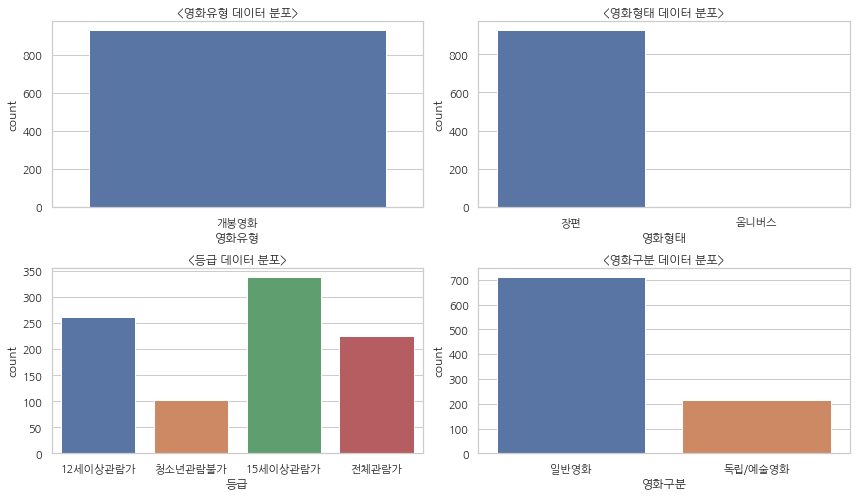

In [165]:
plt.figure(figsize=(12, 7))

plt.subplot(221)
sns.countplot(df['영화유형'])
plt.title("<영화유형 데이터 분포>")

plt.subplot(222)
sns.countplot(df['영화형태'])
plt.title("<영화형태 데이터 분포>")

plt.subplot(223)
sns.countplot(df['등급'])
plt.title("<등급 데이터 분포>")

plt.subplot(224)
sns.countplot(df['영화구분'])
plt.title("<영화구분 데이터 분포>")
plt.tight_layout ()
plt.show()

In [177]:
df[df['영화구분'] == '독립/예술영화']['영화명'].unique()

array(['위플래쉬', '님아, 그 강을 건너지 마오', '오즈의 마법사: 돌아온 도로시', '개를 훔치는 완벽한 방법',
       '소셜포비아', '아메리칸 셰프', '화장', '눈의 여왕 2: 트롤의 마법거울', '스틸 앨리스',
       '빌리와 용감한 녀석들 3', '심야식당', '빅 아이즈', '와일드', '세인트 빈센트', '타임 패러독스',
       '위아영', '드래곤 블레이드', '나이트 크롤러', '더 라스트: 나루토 더 무비', '바다 탐험대 옥토넛 스페셜',
       '엘리노어 릭비: 그 남자 그 여자', '송 원', '한 번 더 해피엔딩', '어린왕자', '뮨: 달의 요정',
       '우먼 인 골드', '시카리오: 암살자의 도시', '미라클 벨리에', '프리덤', '맥베스',
       '더 매직: 리틀톰과 도둑공주', '숀더쉽', '지금은맞고그때는틀리다', '러덜리스', '대니 콜린스',
       '고녀석 맛나겠다2 : 함께라서 행복해', '더 랍스터', '이웃집에 신이 산다', '바닷마을 다이어리',
       '싱 스트리트', '나의 소녀시대', '캐롤', '글로리데이', '매직브러시', '대니쉬 걸', '헤이트풀8',
       '다이노소어 어드벤처 : 백악기 공룡대백과', '크리미널', '유스', '오베라는 남자', '다이노X 탐험대', '룸',
       '본 투 비 블루', '레터스 투 갓', '바다 탐험대 옥토넛 시즌4: 빙하탐험선S', '트럼보',
       '바다 탐험대 옥토넛 시즌4: 아슬아슬 구조대작전', '더 보이', '드레스메이커', '드림 쏭',
       '아이 엠 어 히어로', '무현, 두 도시 이야기', '빅', '서울역', '장난감이 살아있다', '플로렌스',
       '로빈슨 크루소', '자백', '카페 소사이어티', '죽여주는 여자', '감바의 대모험', '나의 산티아고',
       '태풍이 지나가고', '슈퍼 프렌즈', '최악의 하루', '바다 탐험대 옥

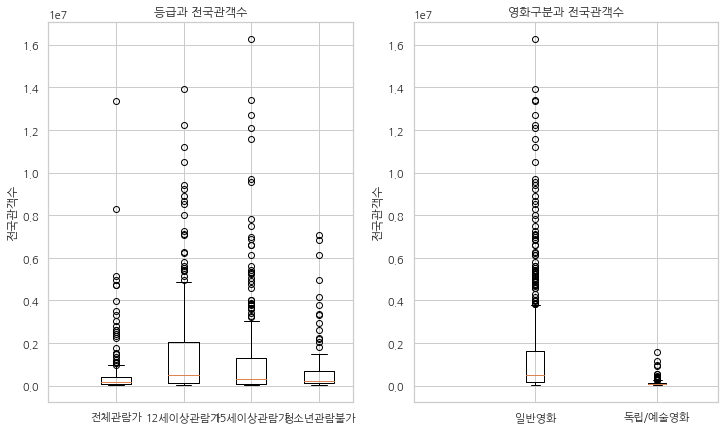

In [170]:
plt.figure(figsize=(12, 7))

plt.subplot(121)
plt.boxplot((df[df['등급'] == '전체관람가']['전국관객수'], df[df['등급'] == '12세이상관람가']['전국관객수'],
            df[df['등급'] == '15세이상관람가']['전국관객수'], df[df['등급'] == '청소년관람불가']['전국관객수']))
plt.ylabel("전국관객수")
plt.xticks(np.arange(5), (' ', '전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가'))
plt.title("등급과 전국관객수")

plt.subplot(122)
plt.boxplot((df[df['영화구분'] == '일반영화']['전국관객수'], df[df['영화구분'] == '독립/예술영화']['전국관객수']))
plt.ylabel("전국관객수")
plt.xticks(np.arange(3), (' ', '일반영화', '독립/예술영화'))
plt.title("영화구분과 전국관객수")
plt.show()

In [172]:
df[df['등급'] == '전체관람가'].sort_values(by='전국관객수', ascending=False)[['영화명', '등급', '전국관객수']]

,영화명,등급,전국관객수
836,겨울왕국 2,전체관람가,13369087
750,알라딘,전체관람가,8271797
379,미녀와 야수,전체관람가,5137993
107,인사이드 아웃,전체관람가,4968687
842,라이온 킹,전체관람가,4743184
...,...,...,...
652,벅스 프렌즈,전체관람가,35919
654,스파키,전체관람가,35436
745,"오늘 밤, 로맨스 극장에서",전체관람가,34897
746,펭귄 하이웨이,전체관람가,34795


In [173]:
df[df['등급'] == '12세이상관람가'].sort_values(by='전국관객수', ascending=False)[['영화명', '등급', '전국관객수']]

,영화명,등급,전국관객수
748,어벤져스: 엔드게임,12세이상관람가,13918759
655,신과함께-인과 연,12세이상관람가,12253247
563,어벤져스: 인피니티 워,12세이상관람가,11202637
0,어벤져스: 에이지 오브 울트론,12세이상관람가,10494499
837,엑시트,12세이상관람가,9426011
...,...,...,...
835,세상을 바꾼 변호인,12세이상관람가,38217
743,이별의 아침에 약속의 꽃을 장식하자,12세이상관람가,37764
649,다키스트 아워,12세이상관람가,37300
653,패터슨,12세이상관람가,35870


In [174]:
df[df['등급'] == '15세이상관람가'].sort_values(by='전국관객수', ascending=False)[['영화명', '등급', '전국관객수']]

,영화명,등급,전국관객수
747,극한직업,15세이상관람가,16263360
100,베테랑,15세이상관람가,13395400
101,암살,15세이상관람가,12705700
470,택시운전사,15세이상관람가,12099614
286,부산행,15세이상관람가,11565078
...,...,...,...
647,더 포리너,15세이상관람가,40882
922,메기,15세이상관람가,38108
744,툴리,15세이상관람가,37241
651,아일라,15세이상관람가,36335


In [175]:
df[df['등급'] == '청소년관람불가'].sort_values(by='전국관객수', ascending=False)[['영화명', '등급', '전국관객수']]

,영화명,등급,전국관객수
102,내부자들,청소년관람불가,7055074
473,범죄도시,청소년관람불가,6851297
2,킹스맨 : 시크릿 에이전트,청소년관람불가,6125154
476,킹스맨: 골든 서클,청소년관람불가,4945484
199,아가씨,청소년관람불가,4142912
...,...,...,...
192,스트레이트 아웃 오브 컴턴,청소년관람불가,48844
561,마더!,청소년관람불가,46469
194,크림슨 피크,청소년관람불가,46411
917,허슬러,청소년관람불가,43809


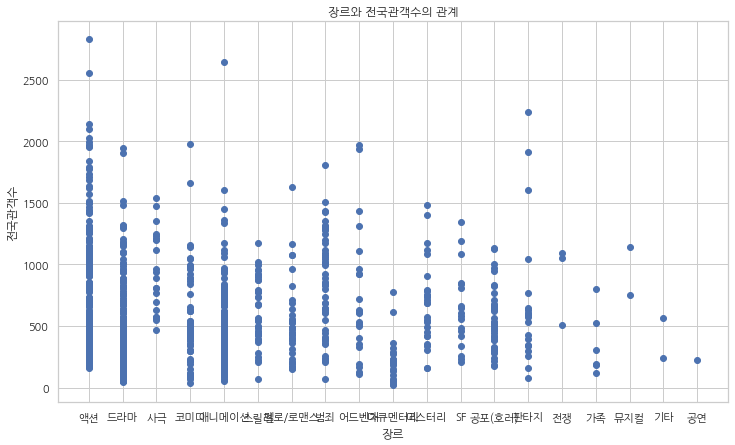

In [184]:
plt.figure(figsize=(12, 7))
plt.scatter(df['장르'], df['전국스크린수'])
plt.title("장르와 전국관객수의 관계")
plt.xlabel("장르")
plt.ylabel("전국관객수")
plt.show()